<a href="https://colab.research.google.com/github/AnkurSahoo45/AnkurSahoo45/blob/main/internship_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Embedding,Dense,Dropout,LSTM,Bidirectional
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
df_train = pd.read_csv('/content/train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_test = pd.read_csv('/content/test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_val=pd.read_csv('/content/val.txt',header=None,sep=';',names=['Input','Sentiment'],encoding='utf-8')

In [3]:
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [5]:
df_val.head()

,Input,Sentiment
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      2000 non-null   object
 1   Sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [8]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      2000 non-null   object
 1   Sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [9]:
df_train['Sentiment'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Sentiment, dtype: int64

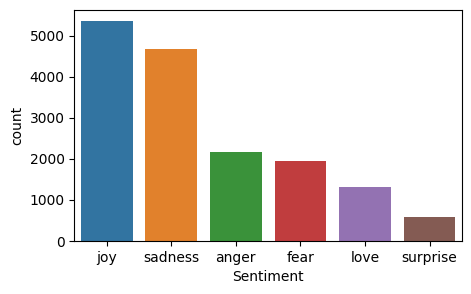

In [10]:
plt.figure(figsize=(5,3))
sns.countplot(x='Sentiment', data=df_train, order=df_train.Sentiment.value_counts().index);

In [11]:
df_train.duplicated().sum()

1

In [12]:
index = df_train[df_train.duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [13]:
df_train[df_train['Input'].duplicated() == True].value_counts().sum()

30

In [14]:
index = df_train[df_train['Input'].duplicated() == True].index
df_train.drop(index, axis = 0, inplace = True)
df_train.reset_index(inplace=True, drop = True)

In [15]:
df_test['Sentiment'].value_counts()

joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: Sentiment, dtype: int64

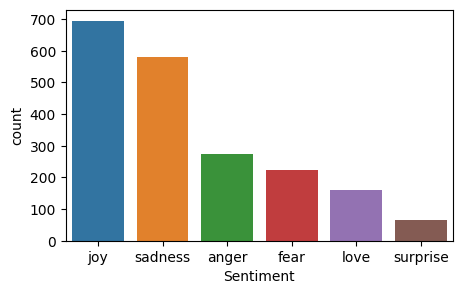

In [16]:
plt.figure(figsize=(5,3))
sns.countplot(x='Sentiment', data=df_test,order=df_test.Sentiment.value_counts().index);

In [17]:
df_test.duplicated().sum()

0

In [18]:
df_test[df_test['Input'].duplicated() == True].value_counts().sum()

0

In [19]:
df_val['Sentiment'].value_counts()

joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: Sentiment, dtype: int64

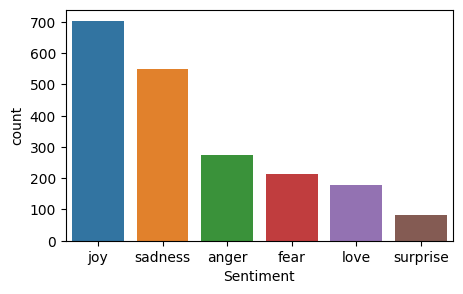

In [20]:
plt.figure(figsize=(5,3))
sns.countplot(x='Sentiment', data=df_val, order=df_val.Sentiment.value_counts().index);

In [21]:
df_val.duplicated().sum()

0

In [22]:
df_val[df_val['Input'].duplicated() == True]

,Input,Sentiment
603,i have had several new members tell me how com...,joy
1993,i feel so tortured by it,anger


In [23]:
index = df_val[df_val['Input'].duplicated() == True].index
df_val.drop(index, axis = 0, inplace = True)
df_val.reset_index(inplace=True, drop = True)

In [24]:
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]

    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):

    text = text.split()

    text=[y.lower() for y in text]

    return " " .join(text)

def Removing_punctuations(text):
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.Input=df.Input.apply(lambda text : lower_case(text))
    df.Input=df.Input.apply(lambda text : remove_stop_words(text))
    df.Input=df.Input.apply(lambda text : Removing_numbers(text))
    df.Input=df.Input.apply(lambda text : Removing_punctuations(text))
    df.Input=df.Input.apply(lambda text : Removing_urls(text))
    df.Input=df.Input.apply(lambda text : lemmatization(text))
    return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
nltk.download('wordnet')
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [26]:
X_train = df_train['Input'].values
y_train = df_train['Sentiment'].values

X_test = df_test['Input'].values
y_test = df_test['Sentiment'].values

X_val = df_val['Input'].values
y_val = df_val['Sentiment'].values

In [27]:
def train_model(model, data, targets):
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    text_clf.fit(data, targets)
    return text_clf

In [28]:
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

In [29]:
y_pred=log_reg.predict(X_test)

In [30]:
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

Accuracy:  0.8685 



In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.89      0.83      0.86       275
        fear       0.88      0.77      0.82       224
         joy       0.83      0.96      0.89       695
        love       0.86      0.60      0.70       159
     sadness       0.90      0.93      0.92       581
    surprise       0.94      0.47      0.63        66

    accuracy                           0.87      2000
   macro avg       0.88      0.76      0.80      2000
weighted avg       0.87      0.87      0.86      2000



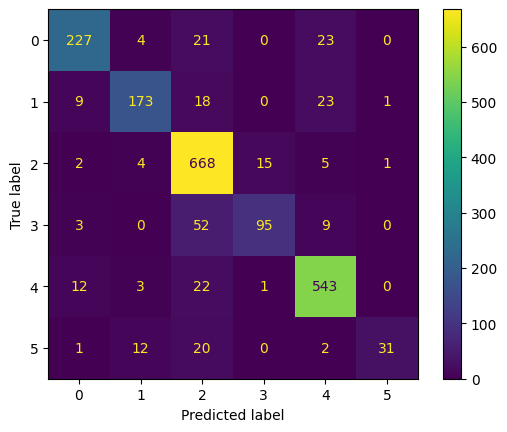

In [32]:
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [33]:
DT = train_model(DecisionTreeClassifier(random_state = 0), X_train, y_train)

In [34]:
y_pred=DT.predict(X_test)
DT_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', DT_accuracy,'\n')

Accuracy:  0.859 



In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.86      0.89      0.87       275
        fear       0.80      0.79      0.80       224
         joy       0.90      0.88      0.89       695
        love       0.72      0.76      0.74       159
     sadness       0.90      0.90      0.90       581
    surprise       0.60      0.64      0.62        66

    accuracy                           0.86      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.86      0.86      0.86      2000



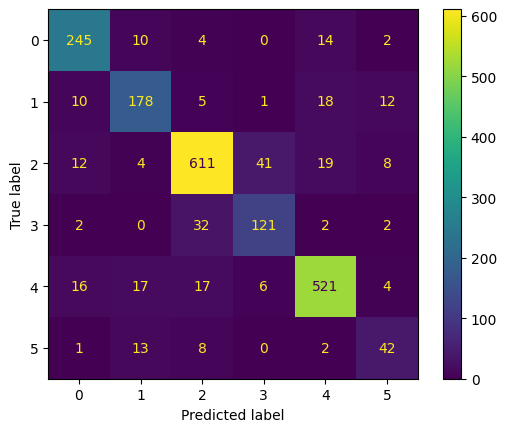

In [36]:
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [37]:
RF = train_model(RandomForestClassifier(random_state = 0), X_train, y_train)

In [38]:
y_pred=RF.predict(X_test)
RF_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', RF_accuracy,'\n')

Accuracy:  0.8895 



In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.90      0.91      0.90       275
        fear       0.85      0.88      0.87       224
         joy       0.89      0.93      0.91       695
        love       0.80      0.69      0.74       159
     sadness       0.95      0.92      0.93       581
    surprise       0.68      0.59      0.63        66

    accuracy                           0.89      2000
   macro avg       0.85      0.82      0.83      2000
weighted avg       0.89      0.89      0.89      2000



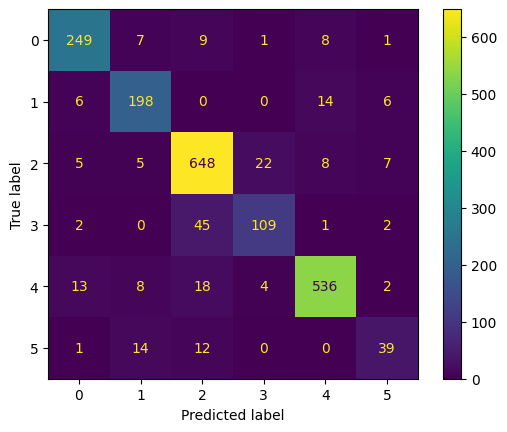

In [40]:
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [41]:
SVM = train_model(SVC(random_state = 0), X_train, y_train)

In [42]:
y_pred=SVM.predict(X_test)
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

Accuracy:  0.8675 



In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.90      0.82      0.86       275
        fear       0.86      0.79      0.83       224
         joy       0.83      0.96      0.89       695
        love       0.84      0.57      0.68       159
     sadness       0.91      0.92      0.91       581
    surprise       0.85      0.53      0.65        66

    accuracy                           0.87      2000
   macro avg       0.87      0.77      0.80      2000
weighted avg       0.87      0.87      0.86      2000



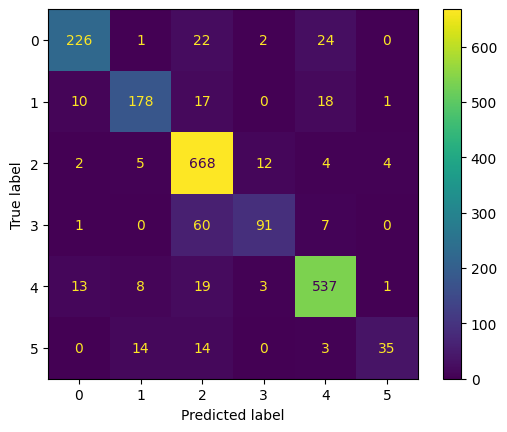

In [44]:
matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(matrix)
display.plot()

In [45]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Support Vector Machine','Random Forest'],
    'Accuracy': [log_reg_accuracy.round(2), DT_accuracy.round(2), SVM_accuracy.round(2), RF_accuracy.round(2)]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,Random Forest,0.89
1,Logistic Regression,0.87
2,Support Vector Machine,0.87
3,Decision Tree,0.86


In [46]:
X_train = df_train['Input']
y_train = df_train['Sentiment']

X_test = df_test['Input']
y_test = df_test['Sentiment']

X_val = df_val['Input']
y_val = df_val['Sentiment']

In [47]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [48]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [49]:
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(X_train)

In [50]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [51]:
X_train = pad_sequences(sequences_train, maxlen=80, truncating='post')
X_test = pad_sequences(sequences_test, maxlen=80, truncating='post')
X_val = pad_sequences(sequences_val, maxlen=80, truncating='post')

In [52]:
model = Sequential()
model.add(Embedding(15214, 64, input_length=80))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 80, 64)            973696    
                                                                 
 bidirectional (Bidirection  (None, 80, 512)           657408    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 80, 512)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 80, 256)           656384    
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 80, 256)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 256)               3

In [53]:
earlystopping = EarlyStopping(monitor ="val_loss",
                              patience = 4,
                              verbose = 1,
                              restore_best_weights = True)

hist=model.fit(X_train,y_train, epochs=8, validation_data=(X_val,y_val), verbose = 1, callbacks=[earlystopping])

Epoch 1/8
500/500 [==============================] - 55s 71ms/step - loss: 1.0228 - accuracy: 0.6114 - val_loss: 0.4753 - val_accuracy: 0.8428
Epoch 2/8
500/500 [==============================] - 19s 38ms/step - loss: 0.3025 - accuracy: 0.8989 - val_loss: 0.2307 - val_accuracy: 0.9194
Epoch 3/8
500/500 [==============================] - 20s 40ms/step - loss: 0.1587 - accuracy: 0.9455 - val_loss: 0.1930 - val_accuracy: 0.9269
Epoch 4/8
500/500 [==============================] - 17s 33ms/step - loss: 0.1171 - accuracy: 0.9574 - val_loss: 0.2055 - val_accuracy: 0.9314
Epoch 5/8
500/500 [==============================] - 16s 32ms/step - loss: 0.0883 - accuracy: 0.9669 - val_loss: 0.2246 - val_accuracy: 0.9299
Epoch 6/8
500/500 [==============================] - 16s 32ms/step - loss: 0.0757 - accuracy: 0.9727 - val_loss: 0.2302 - val_accuracy: 0.9249
Epoch 7/8
500/500 [==============================] - 16s 32ms/step - loss: 0.0562 - accuracy: 0.9813 - val_loss: 0.2236 - val_accuracy: 0.9299

In [54]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 2s 30ms/step - loss: 0.1923 - accuracy: 0.9195


[0.19234833121299744, 0.9194999933242798]

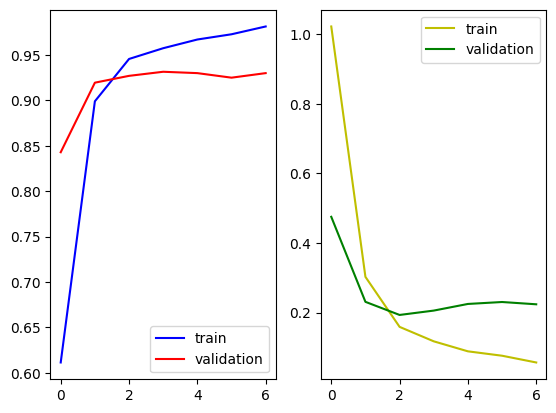

In [55]:
plt.subplot(1, 2, 1)
plt.plot(hist.history['accuracy'], c='b',label='train')
plt.plot(hist.history['val_accuracy'], c='r',label='validation')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], c='y',label='train')
plt.plot(hist.history['val_loss'], c='g',label='validation')
plt.legend(loc='upper right')

In [56]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
print(classification_report(le.transform(df_test['Sentiment']), y_pred))

63/63 [==============================] - 4s 17ms/step
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       275
           1       0.83      0.85      0.84       224
           2       0.93      0.97      0.95       695
           3       0.91      0.74      0.81       159
           4       0.96      0.97      0.97       581
           5       0.67      0.64      0.65        66

    accuracy                           0.92      2000
   macro avg       0.87      0.85      0.86      2000
weighted avg       0.92      0.92      0.92      2000



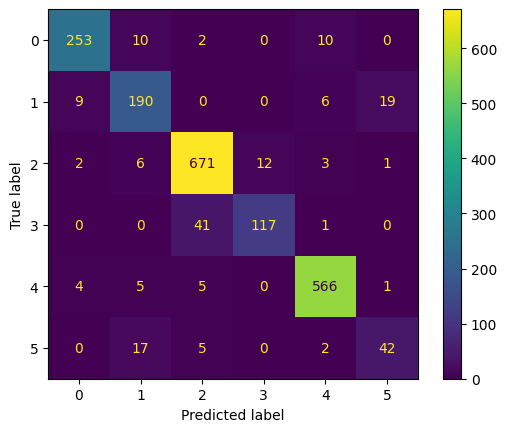

In [57]:
matrix = confusion_matrix(le.transform(df_test['Sentiment']), y_pred)
display = ConfusionMatrixDisplay(matrix)
display.plot()